# Introductory CNN Model: MNIST Digits

----------------------------------

In this example, we will download the MNIST handwritten digits and create a simple CNN network based on LeNet-5 to predict the digit category (0-9).

To start, we load the necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Keras has a built in method for loading the MNIST data sets.

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

#Padding the images by 2 pixels since in the paper input images were 32x32
# x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [4]:
x_train = x_train / 255
x_test = x_test/ 255

Now, we set the model parameters as follows.

In [5]:
## Set model parameters
image_width = x_train[0].shape[0]
image_height = x_train[0].shape[1]
num_channels = 1 # grayscale = 1 channel

# training and test data variables
batch_size = 100
evaluation_size = 500
epochs = 1000
eval_every = 5

# set for reproducible results
seed = 98
np.random.seed(seed)
tf.random.set_seed(seed)

Here we declare our model.
We will have the feature extractor module composed of two convolutional/relu/max pooling layers followed by the classifier with fully connected layers.

In [6]:
input_data = tf.keras.Input(dtype=tf.float32, shape=(image_width,image_height, num_channels), name="INPUT")

# First Conv-ReLU-MaxPool Layer
conv1 = tf.keras.layers.Conv2D(filters=6,
                               kernel_size=5,
                               padding='VALID',
                               activation="relu",
                               name="C1")(input_data)

max_pool1 = tf.keras.layers.MaxPool2D(pool_size=2,
                                      strides=2, 
                                      padding='SAME',
                                      name="S1")(conv1)

# Second Conv-ReLU-MaxPool Layer
conv2 = tf.keras.layers.Conv2D(filters=16,
                               kernel_size=5,
                               padding='VALID',
                               strides=1,
                               activation="relu",
                               name="C3")(max_pool1)

max_pool2 = tf.keras.layers.MaxPool2D(pool_size=2,
                                      strides=2, 
                                      padding='SAME',
                                      name="S4")(conv2)

# Flatten Layer
flatten = tf.keras.layers.Flatten(name="FLATTEN")(max_pool2)


# First Fully Connected Layer
fully_connected1 = tf.keras.layers.Dense(units=120,
                                         activation="relu",
                                         name="F5")(flatten)

# Second Fully Connected Layer
fully_connected2 = tf.keras.layers.Dense(units=84,
                                         activation="relu",
                                         name="F6")(fully_connected1)

# Final Fully Connected Layer
final_model_output = tf.keras.layers.Dense(units=10,
                                           activation="softmax",
                                           name="OUTPUT"
                                           )(fully_connected2)
    

model = tf.keras.Model(inputs= input_data, outputs=final_model_output)

2022-02-22 01:14:36.625550: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-02-22 01:14:36.652955: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (100)
2022-02-22 01:14:36.652994: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LuizGustavo-PC): /proc/driver/nvidia/version does not exist
2022-02-22 01:14:36.654080: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-02-22 01:14:36.668762: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 3500000000 Hz
2022-02-22 01:14:36.669753: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f2c74000b60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-02-22 01:14:36.669773: I tensorflow/compi

We will compile the model with the sparse categorical cross-entropy loss and the ADAM optimizer.

In [7]:
model.compile(
    optimizer="adam", 
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
C1 (Conv2D)                  (None, 24, 24, 6)         156       
_________________________________________________________________
S1 (MaxPooling2D)            (None, 12, 12, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 8, 8, 16)          2416      
_________________________________________________________________
S4 (MaxPooling2D)            (None, 4, 4, 16)          0         
_________________________________________________________________
FLATTEN (Flatten)            (None, 256)               0         
_________________________________________________________________
F5 (Dense)                   (None, 120)               30840 

Now we can start training!

In [9]:
# Start training loop
train_loss = []
train_acc = []
test_acc = []
for i in range(epochs):
    rand_index = np.random.choice(len(x_train), size=batch_size)
    rand_x = x_train[rand_index]
    rand_y = y_train[rand_index]
    
    history_train = model.train_on_batch(rand_x, rand_y)
    
    if (i+1) % eval_every == 0:
        eval_index = np.random.choice(len(x_test), size=evaluation_size)
        eval_x = x_test[eval_index]
        eval_y = y_test[eval_index]
        
        history_eval = model.evaluate(eval_x,eval_y)
        
        # Record and print results
        train_loss.append(history_train[0])
        train_acc.append(history_train[1])
        test_acc.append(history_eval[1])
        acc_and_loss = [(i+1), history_train[0], history_train[1], history_eval[1]]
        acc_and_loss = [np.round(x,2) for x in acc_and_loss]
        print('Epoch # {}. Train Loss: {:.2f}. Train Acc (Test Acc): {:.2f} ({:.2f})'.format(*acc_and_loss))

16/16 [==============================] - 0s 3ms/step - loss: 2.1950 - accuracy: 0.3100
Epoch # 5. Train Loss: 2.21. Train Acc (Test Acc): 0.23 (0.31)
16/16 [==============================] - 0s 3ms/step - loss: 2.0484 - accuracy: 0.4880
Epoch # 10. Train Loss: 2.08. Train Acc (Test Acc): 0.47 (0.49)
16/16 [==============================] - 0s 4ms/step - loss: 1.7417 - accuracy: 0.7020
Epoch # 15. Train Loss: 1.84. Train Acc (Test Acc): 0.64 (0.70)
16/16 [==============================] - 0s 4ms/step - loss: 1.3469 - accuracy: 0.7400
Epoch # 20. Train Loss: 1.47. Train Acc (Test Acc): 0.71 (0.74)
16/16 [==============================] - 0s 4ms/step - loss: 0.9640 - accuracy: 0.8100
Epoch # 25. Train Loss: 1.10. Train Acc (Test Acc): 0.80 (0.81)
16/16 [==============================] - 0s 4ms/step - loss: 0.7149 - accuracy: 0.8120
Epoch # 30. Train Loss: 0.91. Train Acc (Test Acc): 0.75 (0.81)
16/16 [==============================] - 0s 3ms/step - loss: 0.5681 - accuracy: 0.8380
Epoch # 

In [13]:
history_train[0]

0.029403138905763626

Let's plot the loss and accuracy.

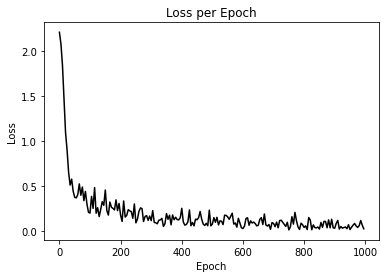

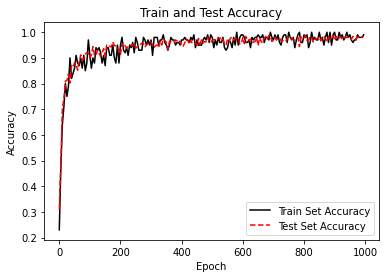

In [14]:
# Matlotlib code to plot the loss and accuracy
eval_indices = range(0, epochs, eval_every)
# Plot loss over time
plt.plot(eval_indices, train_loss, 'k-')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot train and test accuracy
plt.plot(eval_indices, train_acc, 'k-', label='Train Set Accuracy')
plt.plot(eval_indices, test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

Let's see how our model runs on 6 examples.

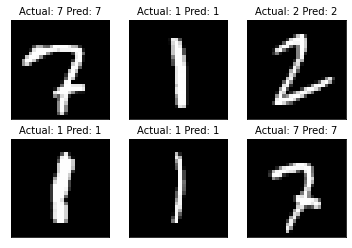

In [12]:
# Plot some samples and their predictions
actuals = y_test[36:42]
preds = model.predict(x_test[36:42])
predictions = np.argmax(preds,axis=1)
images = np.squeeze(x_test[36:42])

Nrows = 2
Ncols = 3
for i in range(6):
    plt.subplot(Nrows, Ncols, i+1)
    plt.imshow(np.reshape(images[i], [28,28]), cmap='Greys_r')
    plt.title('Actual: ' + str(actuals[i]) + ' Pred: ' + str(predictions[i]),
                               fontsize=10)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

In [18]:
import tensorflowjs as tfjs
import time

today = time.strftime("%Y-%m-%d")
tfjs.converters.save_keras_model(model, f"../../models/{today}")